###### Lab 7 - EE350
# Estimation et prédiction linéaire

**NOM, prénom :**
DIAKHATE-PALME, Arden

À rendre le 20 decembre 2021

Pour faciliter la correction, merci de nommer le fichier compressé que vous soumettez NOM_prenom_lab7.zip et les noms de tous les auteurs. 


In [6]:
# Imports
from scipy import signal, special
import numpy as np
import numpy.random as npr
from scipy.io import wavfile
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile
from scipy.linalg import toeplitz

## Exercice 1: Prédiction linéaire

Dans cette question on va étudier la prédiction linéaire d'un signal correspondant à un processus aléatoire. Ce processus aléatoire est donné par:

$$
x(n)−0.8x(n−1)+0.15x(n−2) = 3w(n)−1.1w(n−1)
$$

avec $w(n)$, un bruit blanc avec moyenne nulle et variance $\sigma^2_w$.

**1.** De quel type de processus aléatoire s'agit-il (AR, MA ou ARMA)? Le processus est-il stationnaire? Discutez.

 Réponse : Il s'agit d'un processus ARMA. Le bruit blanc $w(n)$ est stationnaire, alors le processus $X(n)$ est aussi stationnaire.

**2.** Calculez la fonction de transfert $H(z)$  qui décrit le processus générant $x(n)$ à partir
de $w(n)$.

 Réponse : Pour un processus ARMA,
 $$
 H(z) = \frac{B(z)}{A(z)} = \frac{3 - 1.1z^{-1}}{1 - 0.8z^{-1} +0.15z^{-2}}
 $$

**3.** Appliquez la transformée en $Z$ inverse afin d’obtenir la réponse impulsionnelle $h(n)$ en vous rappelant que la transformée en $Z$ inverse d’un système causal avec un pôle $H(z) = \dfrac{1}{1-az^{-1}}$ est $h(n) = a^nu(n)$.

 Réponse : 
 D'abbord on récrit $H(z)$ en utilizant une décomposition par fraction partielles. 
 $$
 H(z) = \frac{3 - 1.1z^{-1}}{1 - 0.8z^{-1} +0.15z^{-2}} = \frac{1}{1-0.5z^{-1}} + \frac{2}{1-0.3z^{-1}} \\
 \implies h[n] = (0.5)^n u[n] + 2(0.3)^n u[n]
 $$


**4.** Fournissez le système d'équations pour les trois premiers coefficients de la fonction de corrélation de $x(n)$: $ \gamma_{xx}(0), \gamma_{xx}(1)$ et $\gamma_{xx}(2)$ à partir du système suivant :
$$
\gamma_{xx}(m) =
\begin{cases}
    -\sum_{k=1}^p a_k \gamma_{xx}(m-k), & m > q \\
    -\sum_{k=1}^p a_k \gamma_{xx}(m-k)+ \sigma^2_w \sum_{k=0}^{q-m}b_{k+m}h(k), & 0 \leq m \leq q \\
    \gamma^*_{xx}(-m), & m < 0
\end{cases}
$$
Considerez que $\sigma^2_w =2$.
<!-- Trouvez les trois premiers coefficients de la fonction d’auto-corrélation de $x(n)$: $\gamma_{xx}(0), \gamma_{xx}(1)$ et
$\gamma_{xx}(2)$ en terme des $\sigma^2_w$. -->




**Rappel :** Pour les signaux à valeur dans $\mathbb R$, $\gamma_{xx}(-m) = \gamma_{xx}(m)$.


Réponse :
$$ x(n)−0.8x(n−1)+0.15x(n−2) = 3w(n)−1.1w(n−1) $$

Given that $p=2$ and $q=1$ from the expression of an ARMA process given above, we can simplify $\gamma_{xx}(0)$ to the following since $0 \leq m \leq q \implies 0 \leq (m=0) \leq 1$:

$\begin{align}
\gamma_{xx}(0) &= -\sum_{k=1}^2 a_k \gamma_{xx}(-k)+ 2\sum_{k=0}^{1}b_{k}h(k) \, =\, 0.8\gamma_{xx}(1) - 0.15\gamma_{xx}(2) + 15.58 \\
\gamma_{xx}(1) &= -\sum_{k=1}^2 a_k \gamma_{xx}(1-k)+ 2\sum_{k=0}^{0}b_{k+1}h(k) \, =\, 0.8\gamma_{xx}(0) - 0.15\gamma_{xx}(1) -3.3 \\
\gamma_{xx}(2) &= -\sum_{k=1}^2 a_k \gamma_{xx}(2-k) + 2\sum_{k=0}^{-1}b_{k+2}h(k) \, = \, -\sum_{k=1}^2 a_k \gamma_{xx}(2-k) = 0.8\gamma_{xx}(1) - 0.15\gamma_{xx}(0)
\end{align}$

Hence, we obtained a system of three equations:

$\begin{cases}
    \gamma_{xx}(0) = 0.8\gamma_{xx}(1) - 0.15\gamma_{xx}(2) + 15.58 \\
    \gamma_{xx}(1) = 0.8\gamma_{xx}(0) - 0.15\gamma_{xx}(1) -3.3 \\
    \gamma_{xx}(2) = 0.8\gamma_{xx}(1) - 0.15\gamma_{xx}(0) 
\end{cases}$


In [9]:
#solving system of equations for [gamma_xx(0), gamma_xx(1), gamma_xx(2)]
coeff_matrix = np.array([
    [-1, 0.8, -0.15],
    [0.8, -1.15, 0],
    [-0.15, -0.8, -1]
])
soln= np.array([-15.58, 3.3, 0])
gammas = np.linalg.solve(coeff_matrix, soln)
print(gammas)

[ 38.34074074  23.80225443 -24.79291465]


Solving the system of equations, we obtain:
$
\gamma_{xx}(0) = 38.3407 \;
\gamma_{xx}(1) = 23.8023 \;
\gamma_{xx}(2) = -24.7929 
$

**5. Equations normales** 
Les équations normales qui décrivent le filtre de prédiction linéaire optimale du second ordre sont :

\begin{align}
\gamma_{xx}(1) &= −a_2(1)\gamma_{xx}(0) − a_2(2)\gamma_{xx}(−1) \\
\gamma_{xx}(2) &= −a_2(1)\gamma_{xx}(1) − a_2(2)\gamma_{xx}(0)
\end{align}

En utilisant ces équations, calculez les coefficients $a_2(1)$ et $a_2(2)$ du filtre de prédiction linéaire optimal du second ordre en fonction de $\gamma_{xx}(0)$, $\gamma_{xx}(1)$ et $\gamma_{xx}(2)$. Donnez l'expression de l'erreur quadratique moyenne minimale du filtre, $\min\mathcal{E}^f_2$.



Réponse :

$
\begin{align}
\gamma_{xx}(1) &= −a_2(1)\gamma_{xx}(0) − a_2(2)\gamma_{xx}(1) \implies \, 23.8023 = -38.3407a_2(1) -23.8023a_2(2)\\
\gamma_{xx}(2) &= −a_2(1)\gamma_{xx}(1) − a_2(2)\gamma_{xx}(0) \implies \, -24.7929 = -23.8023a_2(1) -38.3407a_2(2) \\
\end{align}
$

$\begin{align}
a_2(1) &= \left(\frac{\gamma_{xx}(1)}{\gamma_{xx}(0)}\right)\left(1 - \frac{\gamma_{xx}(2)\gamma_{xx}(0) + \gamma_{xx}^2(1)}{\gamma_{xx}^2(1) +\gamma_{xx}^2(0)} \right) \\
a_2(2) &= - \frac{\gamma_{xx}(2)\gamma_{xx}(0) + \gamma_{xx}^2(1)}{\gamma_{xx}^2(1) +\gamma_{xx}^2(0)}
\end{align}$

On obtient $a_2(1)=-1.66328877$ et $a_2(2) = 1.67923039$ en évaluant les expressions.

$\begin{align}
\min\left[\mathcal{E}^f_2\right] &= \frac{\gamma_{xx}^2(1) + \gamma_{xx}^2(0)}{\gamma_{xx}(0)} - \left(\frac{\gamma_{xx}(2)\gamma_{xx}(0) + \gamma_{xx}^2(1)}{\gamma_{xx}^2(1) + \gamma_{xx}^2(0)}\right)\left[\frac{\gamma_{xx}^2(1)}{\gamma_{xx}(0)} + \gamma_{xx}(2) \right]
\end{align}$


## Exercice 2 : Filtre de Wiener

### Filtre de Wiener 
Dans cet exercice, nous étudions le débruitage d'un signal audio en utilisant un filtre de Wiener RIF. Considérez le modèle $x(n)= d(n) + v(n) $ où $d(n)$ est le signal d’intérêt, $v(n)$ est un signal de bruit blanc et $x(n)$ est une observation bruitée de $d(n)$. Nous aimerions obtenir une estimation $y(n)$ du signal $d(n)$ à partir du signal bruité $x(n)$ à l'aide d'un filtre (de Wiener) optimum $h(n)$ de taille $M$ :

\begin{equation} 
    y(n)=\sum_{k=0}^{M-1}h(k) x(n-k)
\end{equation}


Afin de débruiter le signal, nous allons modéliser le signal audio $d(n)$ comme un processus stationnaire et ergodique, ce qui nous permet d'estimer ces propriétés statistiques à partir d'une réalisation donnée.


**1. Autocorrélation :**   
Dérivez (précisez chaque étape) l'expression de l'autocorrélation $\gamma_{dd}(k)$ du signal $d(n)$ en fonction de l'autocorrélation $\gamma_{xx}(k)$ du signal bruité et la variance $\sigma_v^2$ du bruit blanc $v(n)$.
    Obtenez aussi l'intercorrélation $\gamma_{dx}(k)$ de $d(n)$ et $x(n)$ en fonction de $\gamma_{dd}(k)$. 

**2. Autocorrélation de x :**

Dans le code suivant,  les 50 premières valeurs de l'auto-correlation temporelle $r_{xx}(k)$ (pour $k=0, 1, \dots, 49$) sont affichés en utilisant un estimateur non-biaisé $r_{xx} (k)$ de l'autocorrelation statistique $\gamma_{xx}(k)$ du signal $x(n)$ à l'aide de la fonction ```numpy.correlate```. 
Quelle approximation peut-on faire qui relie $r_{xx} (k)$ et $\gamma_{xx}(k)$? Vous pouvez vous inspirer du code suivant : 

Text(0, 0.5, ' r_xx (k)')

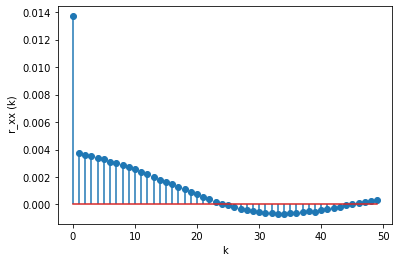

In [2]:
# Read file with wavread
samplerate, x = wavfile.read('x.wav')

# #Normalize to -1 to +1
x = x / 32767

# Correlation normalize
# Pour calculer l'autocorrélation, on fait comme dans le premier exercice
N = len(x)

corr = np.correlate(x, x, "full")
normalization = np.arange(N, 0, -1)
r_xx = corr[:N][::-1]     # Keep the right coefficients and revert the array
r_xx = r_xx / normalization

plt.stem(r_xx[:50])
plt.xlabel('k')
plt.ylabel(' r_xx (k)')

Réponse : 

1.    

$\begin{align}
\gamma_{xx}(k) &= E\left[X(n)X^*(n-k)\right] \\ 
               &= E\left[(d(n)+v(n))(d(n-k)+v(n-k))^*\right] \\ 
               &= E\left[d(n)d(n-k)\right] + E\left[v(n)v(n-k)\right]  \\
               &= \gamma_{dd}(k) + \sigma_v^2\delta(k) \\
\end{align}$

$\begin{align}
\implies \gamma_{dd}(k) &= \gamma_{xx}(k) - \sigma_v^2\delta(k)
\end{align}$

$\begin{align}
\gamma_{dx}(k) &= E\left[d(n)x(n-k)\right] \\
               &= E\left[d(n)(d(n-k) + v(n-k))\right] \\
               &= E\left[d(n)d(n-k)\right] + E\left[d(n)v(n-k)\right] \\
               &= \gamma_{dd}(k)
\end{align}$

2. Parce que le signal $d(n)$ est modélizé comme un processus stationnaire et ergodique, et car $v(n)$ est du bruit blanc, alors $x(n)$ est aussi un processus stationnaire et ergodique. L'approximation $r_{xx}(k)$ de l'autocorrelation $\gamma_{xx}(k)$ à partir d'une seule réalization de ce processus stationaire et ergodique, est donnée par l'equation suivante.
$$
r_{xx}(m) = \frac{1}{2N+1} \sum^N_{n=-N} x^*(n)x(n+m) \implies E[r_{xx}(m)] = \gamma_{xx}(m)
$$

**3. Autocorrelation de $d$**


*   On considère la variance $\sigma_v^2$ du bruit connue : $\sigma_v^2 =0.01$. 
    De plus, utilisez l'expression de l'autocorrélation $\gamma_{dd}(k)$ en fonction de $\gamma_{xx}(k)$ et $\sigma_v^2$ (exercise 2.1).  
    Calculez l'autocorrélation $\gamma_{dd}(k)$ du signal $d(n)$ et tracez les 50 premières valeurs de $\gamma_{dd}(k)$.  Vous pouvez compléter le code suivant :

Text(0, 0.5, 'gamma_dd(k)')

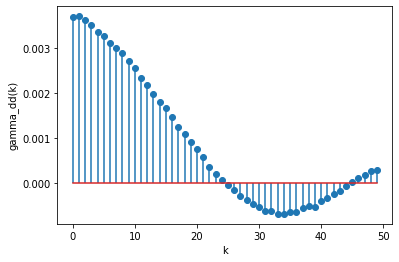

In [10]:
sigma_v_2 = 0.01

gamma_xx = r_xx.copy()

gamma_dd = gamma_xx 
gamma_dd[0] = gamma_xx[0] - sigma_v_2

plt.stem(gamma_dd[:50])
plt.xlabel('k')
plt.ylabel('gamma_dd(k)')

**4. Filtre de Wiener :**
*   D'après le cours, les coefficients du filtre RIF de Wiener d'ordre M sont donnés par la relation matricielle suivante: $h = \Gamma^{-1} \gamma_{d} $
avec $\Gamma \in \mathbb{R}^{M \times M}$ une matrice de Toeplitz telle que $\Gamma_{kl} = \gamma_{xx} \left( l - k \right)$	 et $\gamma_{d} \in \mathbb{R}^M$ tel que $\gamma_{d} (k) = \gamma_{dx} (k)$.

	En prenant $M = 10$, concevez sur Python le filtre de Wiener correspondant. Appliquez le filtre sur le signal $x(n)$. 
	Ecoutez le signal de la sortie $y(n)$ et comparez-le avec le signal original bruité $x(n)$. Vous pouvez vous inspirer du code suivant.


In [11]:
M = 10

r = r_xx.reshape((1, len(r_xx)))
gamma_i = np.linalg.pinv(toeplitz(r[:, 0:M]))
gd = gamma_dd[0:M]
h = gamma_i @ gd.reshape((M, 1))
print('Filter Coefficients:',h)

# Apply filter to signal x[n]
y = np.convolve(h[:, 0], x, 'same')
wavfile.write('filtered.wav', samplerate, y.astype(np.float32))


Filter Coefficients: [[0.11668684]
 [0.11188795]
 [0.09921832]
 [0.08636908]
 [0.07347196]
 [0.06697829]
 [0.05546806]
 [0.05055777]
 [0.04450249]
 [0.036969  ]]


Réponse : 
L'amplitude du bruit blanc dans le signal de sortie est largement diminuée par rapport à l'amplitude du bruit blanc dans le signal d'entré.

*    Calculez la valeur de l'erreur (quadratique moyenne) minimale à partir de la formule  $MMSE=\sigma_d^2 - \gamma_d^{*t} \, \Gamma^{-1} \, \gamma_d$  
du filtre de taille $M=10$. Comparez avec l'erreur quadratique moyenne obtenue en pratique (c'est-à-dire la distance entre le signal filtré et le signal non bruité) donné par ```musique.wav```. Vous pouvez utiliser le code suivant: 

In [15]:
_, d = wavfile.read('musique.wav')
d = d/32767
start = 50000
d = d[start: start + len(y)]

# TODO
MMSE_theo = sigma_v_2 - np.conjugate(np.transpose(gd)) @ h 
print('Theoretical value of MMSE is '+str(MMSE_theo))

# TODO: Error between true signal(y) and filtered output(d)
err = np.square(y-d).mean()
print('Exp error: '+str(err))

Theoretical value of MMSE is [0.00746925]
Exp error: 0.000946600099343916


Réponse :
L'erreure quadratique moyenne (MMSE) theoretique est plus haute que L'erreure quadratique moyenne actuelle, ce qui montre que le signal filtré et le signal non bruité sont plus près que prévu.